In [58]:
using Plots


u(x) = x^4/24 - x^3/12 + x/24

In [59]:
N = 10; 
h = 1/N;
xstart = -0. 
xend = 1.
x = Vector(xstart:h:xend)
display(x)

11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

In [60]:
# define the so-called source function 
function U(x)
    
    # Case 1
    #return x^4/12-x/12+1/2
    
    # Case 2
    return x^4-2*x^3+(3/2)*x^2-x/2+1/16
    
end 

U (generic function with 1 method)

In [61]:
f = U.(x)

11-element Vector{Float64}:
 0.0625
 0.025599999999999998
 0.008100000000000003
 0.001600000000000018
 0.00010000000000001674
 0.0
 0.0001000000000000445
 0.0016000000000000458
 0.008099999999999996
 0.0255999999999999
 0.0625

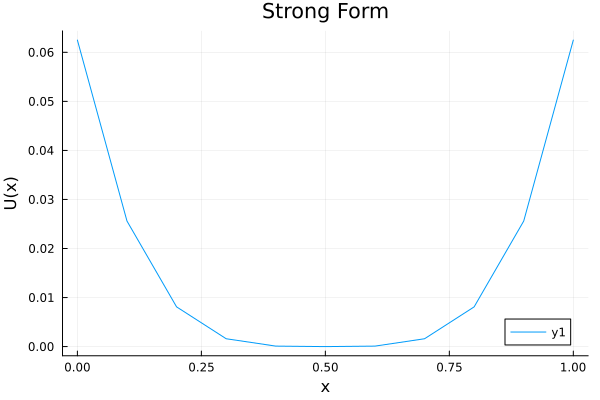

In [62]:
plot(x,f)
title!("Strong Form")
xlabel!("x")
ylabel!("U(x)")

Weak form

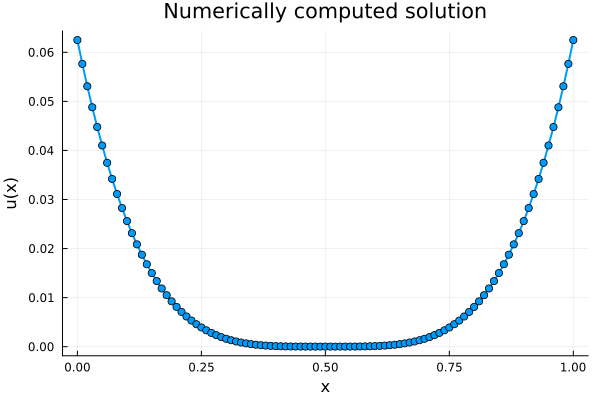

In [63]:
#..construct the mesh: see before 
nelements = 100; nnodes = nelements+1; h = 1/nelements
x = Vector(0:h:1)

#..Mesh with points and edges 
#..point holds the coordinates of the left and right node of the element
#..edges holds the global indices of the left and right node of the element
points = collect( [x[i], x[i+1]] for i in 1:nelements) 
edges = collect( [i, i+1] for i in 1:nelements) 

#..Set the source 

# Case 1
#fsource(x) = x*x


# Case 2
fsource(x) = 12*(x-0.5)^2


#..Initialize local and global matrix and right-hand side value 
floc = zeros(Float64,2, 1)
Aloc = zeros(Float64,2,2)
A = zeros(Float64,nnodes, nnodes)
f = zeros(Float64,nnodes)  

#..Perform loop over elements and assemble global matrix and vector 
for i=1:nelements 

  xl, xr = points[i,:][1]
  floc = -(xr-xl)/2 * [fsource(xl), fsource(xr)]
  Aloc = (1/(xr-xl))*[1 -1; -1 1]

  for j=1:2 
    f[edges[i][j]] += floc[j]
    for k =1:2 
      A[edges[i][j], edges[i][k]] += Aloc[j,k]
    end 
  end 

end

#..handle the boundary conditions in the matrix and right-hand side vector 

# Case 1
#A[1,1] = 1;     A[1,2] = 0;        f[1]   = 1/2
#A[end,end-1]=0; A[end,end] = 1;    f[end] = 1/2

# Case 2
A[1,1] = 1;     A[1,2] = 0;        f[1]   = 1/16
A[end,end-1]=0; A[end,end] = 1;    f[end] = 1/16

#..solve the linear system
u = A \ f

#..plot the solution  
p1=plot(x,u,shape=:circle,lw=2,legend=false)
xlabel!("x") 
ylabel!("u(x)")
title!("Numerically computed solution")